In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
disks = """10.19.137.140
sda 477G
sdb 3.7T
sdc 3.7T
sdd 3.7T
+
10.19.137.141
sda 477G
sdb 3.7T
+
10.19.137.142
sda 477G
sdb 3.7T
sdc 3.7T
sdd 1.8T
+
10.19.137.143
sda 477G
sdb 1.8T
+
10.19.137.144
sda 465.8G
sdb 1.8T
+
10.19.137.146
sda 465.8G
sdb 1.8T
+
10.19.137.147
sda 1.8T
sdb 232.9G
+
10.19.137.148
sda 1.8T
sdb 232.9G
+
10.19.137.149
sda 232.9G
sdb 1.8T
+
10.19.137.150
sda 232.9G
sdb 1.8T
+
10.19.137.151
sda 1.8T
sdb 232.9G
+
10.19.137.153
sda 477G
sdb 3.7T
sdc 3.7T
sdd 1.8T
+
10.19.140.12
sda 1.8T
sdb 1.8T
sdc 447.1G
+
10.19.140.4
sda 1.8T
sdb 1.8T
sdc 447.1G
+
10.19.140.15
sda 1.8T
sdb 1.8T
sdc 1.8T
+
10.19.137.154
sdd 1.8T
sdb 3.7T
sdc 3.7T
sda 477G
+
10.19.137.152
sdb 1.8T
sda 477G
+
10.19.137.145
sdb 1.8T
sda 477G
+
10.19.138.182
sdb 8G
sda 19.3G
+
""".split("+")
vdisks = {}
for s in disks:
    i = s.strip().split("\n")
    if not i or not i[0]:
        continue
    vdisks[i[0]] = "; ".join(i[1:])
vdisks

{'10.19.137.140': 'sda 477G; sdb 3.7T; sdc 3.7T; sdd 3.7T',
 '10.19.137.141': 'sda 477G; sdb 3.7T',
 '10.19.137.142': 'sda 477G; sdb 3.7T; sdc 3.7T; sdd 1.8T',
 '10.19.137.143': 'sda 477G; sdb 1.8T',
 '10.19.137.144': 'sda 465.8G; sdb 1.8T',
 '10.19.137.145': 'sdb 1.8T; sda 477G',
 '10.19.137.146': 'sda 465.8G; sdb 1.8T',
 '10.19.137.147': 'sda 1.8T; sdb 232.9G',
 '10.19.137.148': 'sda 1.8T; sdb 232.9G',
 '10.19.137.149': 'sda 232.9G; sdb 1.8T',
 '10.19.137.150': 'sda 232.9G; sdb 1.8T',
 '10.19.137.151': 'sda 1.8T; sdb 232.9G',
 '10.19.137.152': 'sdb 1.8T; sda 477G',
 '10.19.137.153': 'sda 477G; sdb 3.7T; sdc 3.7T; sdd 1.8T',
 '10.19.137.154': 'sdd 1.8T; sdb 3.7T; sdc 3.7T; sda 477G',
 '10.19.138.182': 'sdb 8G; sda 19.3G',
 '10.19.140.12': 'sda 1.8T; sdb 1.8T; sdc 447.1G',
 '10.19.140.15': 'sda 1.8T; sdb 1.8T; sdc 1.8T',
 '10.19.140.4': 'sda 1.8T; sdb 1.8T; sdc 447.1G'}

In [30]:
hosts = """10.19.137.140
10.19.137.141
10.19.137.142
10.19.137.143
10.19.137.144
10.19.137.145
10.19.137.146
10.19.137.147
10.19.137.148
10.19.137.149
10.19.137.150
10.19.137.151
10.19.137.152
10.19.137.153
10.19.137.154
10.19.138.182
10.19.140.12
10.19.140.15
10.19.140.4""".split("\n")
ceph = ["10.19.137.143", "10.19.137.144", "10.19.137.145", "10.19.137.146", "10.19.137.152"]
master = ['10.19.137.140', '10.19.137.141', '10.19.137.142']
gpu = ['10.19.137.147', '10.19.137.148', '10.19.137.149', '10.19.137.150', '10.19.137.151']
es = ['10.19.137.153', '10.19.140.15', '10.19.137.140', '10.19.137.141', '10.19.137.142']
hdfs = ['10.19.140.4', '10.19.140.12', '10.19.140.15']
bads = ['10.19.140.4', '10.19.140.12', '10.19.140.15']
pvs = {
    "10.19.137.140": "4T*3",
"10.19.137.141": "4T*1",
"10.19.137.142": "4T*2 + 2T*1",
"10.19.137.153": "4T*2 + 2T*1",
"10.19.137.154": "4T*2 + 2T*1",
"10.19.140.4": "500G",
"10.19.140.12": "2T*1",
"10.19.140.15": "2T*2" ,
}
solos=['10.19.138.182']
raw = []
for h in hosts:
    d = {}
    d['host'] = h
    d['ceph'] = ' '
    if h in ceph:
        d['ceph'] = '*'
    d['master'] = ' '
    if h in master:
        d['master'] = '*'
    d['gpu'] = ' '
    if h in gpu:
        d['gpu'] = '*'
    d['es'] = ' '
    if h in es:
        d['es'] = '*'
    d['hdfs'] = ' '
    if h in hdfs:
        d['hdfs'] = '*'
    d['pvs'] = ''
    if h in pvs:
        d['pvs'] = pvs[h]
    cpu = "8"
    memory = "32G"
    if h in bads:
        cpu = "24"
        memory = "64G"
    elif h in gpu:
        memory = "64G"
    elif h in solos:
        cpu = "1"
        memory = "4G"
    d['cpu'] = cpu
    d['memory'] = memory
    d['disks'] = vdisks[h]
    raw.append(d)
v = pd.DataFrame(raw, columns=['host','cpu', 'disks', 'memory', 'pvs', 'master', 'ceph', 'es', 'hdfs', 'gpu']).set_index('host')
writer = pd.ExcelWriter('/home/xzy/output.xlsx')
v.to_excel(writer,'Sheet1')
writer.save()
# v.to_csv("/home/xzy/output.csv")
v

,cpu,disks,memory,pvs,master,ceph,es,hdfs,gpu
host,,,,,,,,,
10.19.137.140,8,sda 477G; sdb 3.7T; sdc 3.7T; sdd 3.7T,32G,4T*3,*,,*,,
10.19.137.141,8,sda 477G; sdb 3.7T,32G,4T*1,*,,*,,
10.19.137.142,8,sda 477G; sdb 3.7T; sdc 3.7T; sdd 1.8T,32G,4T*2 + 2T*1,*,,*,,
10.19.137.143,8,sda 477G; sdb 1.8T,32G,,,*,,,
10.19.137.144,8,sda 465.8G; sdb 1.8T,32G,,,*,,,
10.19.137.145,8,sdb 1.8T; sda 477G,32G,,,*,,,
10.19.137.146,8,sda 465.8G; sdb 1.8T,32G,,,*,,,
10.19.137.147,8,sda 1.8T; sdb 232.9G,64G,,,,,,*
10.19.137.148,8,sda 1.8T; sdb 232.9G,64G,,,,,,*


In [2]:
# normal run 20times
logs = """real	0m4.100s
user	0m3.599s
sys	0m0.500s

real	0m4.120s
user	0m3.601s
sys	0m0.519s

real	0m4.098s
user	0m3.594s
sys	0m0.504s

real	0m4.101s
user	0m3.603s
sys	0m0.498s

real	0m4.098s
user	0m3.601s
sys	0m0.497s

real	0m4.103s
user	0m3.589s
sys	0m0.514s

real	0m4.104s
user	0m3.599s
sys	0m0.505s

real	0m4.100s
user	0m3.590s
sys	0m0.509s

real	0m4.103s
user	0m3.585s
sys	0m0.518s

real	0m4.101s
user	0m3.597s
sys	0m0.504s

real	0m4.101s
user	0m3.610s
sys	0m0.490s

real	0m4.102s
user	0m3.593s
sys	0m0.509s

real	0m4.104s
user	0m3.598s
sys	0m0.506s

real	0m4.103s
user	0m3.597s
sys	0m0.506s

real	0m4.102s
user	0m3.592s
sys	0m0.510s

real	0m4.102s
user	0m3.604s
sys	0m0.498s

real	0m4.103s
user	0m3.598s
sys	0m0.504s

real	0m4.104s
user	0m3.600s
sys	0m0.503s

real	0m4.103s
user	0m3.598s
sys	0m0.505s

real	0m4.103s
user	0m3.590s
sys	0m0.512s""".split('\n')
reports = {
    'real': [],
    'user': [],
    'sys': []
}
import re
pattern = re.compile("(real|user|sys).*m(.*)s.*")
def _extract(r):
    m = pattern.match(r)
    if m:
        return m.group(1), float(m.group(2))
for l in logs:
    r = _extract(l)
    if not r:
        continue
    n, v = r
    reports[n].append(v)
    


In [46]:
# normal run 20times
logs2 = """real	0m2.588s
user	0m2.353s
sys	0m0.211s

real	0m2.563s
user	0m2.343s
sys	0m0.205s

real	0m2.597s
user	0m2.325s
sys	0m0.250s

real	0m2.583s
user	0m2.315s
sys	0m0.254s

real	0m2.566s
user	0m2.393s
sys	0m0.154s

real	0m2.579s
user	0m2.309s
sys	0m0.251s

real	0m2.577s
user	0m2.283s
sys	0m0.278s

real	0m2.570s
user	0m2.274s
sys	0m0.282s

real	0m2.564s
user	0m2.173s
sys	0m0.375s

real	0m2.566s
user	0m2.331s
sys	0m0.215s

real	0m2.598s
user	0m2.380s
sys	0m0.201s

real	0m2.584s
user	0m2.391s
sys	0m0.174s

real	0m2.569s
user	0m2.504s
sys	0m0.049s

real	0m2.589s
user	0m2.375s
sys	0m0.193s

real	0m2.562s
user	0m2.417s
sys	0m0.130s

real	0m2.569s
user	0m2.271s
sys	0m0.280s

real	0m2.568s
user	0m2.273s
sys	0m0.279s

real	0m2.582s
user	0m2.359s
sys	0m0.203s

real	0m2.572s
user	0m2.275s
sys	0m0.282s

real	0m2.570s
user	0m2.331s
sys	0m0.222s
""".split('\n')
reports2 = {
    'real': [],
    'user': [],
    'sys': []
}

for l in logs2:
    r = _extract(l)
    if not r:
        continue
    n, v = r
    reports2[n].append(v)
report2 = pd.DataFrame(reports2)    


,real,sys,user
0,2.588,0.211,2.353
1,2.563,0.205,2.343
2,2.597,0.250,2.325
3,2.583,0.254,2.315
4,2.566,0.154,2.393
5,2.579,0.251,2.309
6,2.577,0.278,2.283
7,2.570,0.282,2.274
8,2.564,0.375,2.173
9,2.566,0.215,2.331


In [47]:
report2.mean(), report2.std()

(real    2.57580
 sys     0.22440
 user    2.33375
 dtype: float64, real    0.011134
 sys     0.068945
 user    0.069494
 dtype: float64)

In [4]:
report = pd.DataFrame(reports)
report

,real,sys,user
0,4.100,0.500,3.599
1,4.120,0.519,3.601
2,4.098,0.504,3.594
3,4.101,0.498,3.603
4,4.098,0.497,3.601
5,4.103,0.514,3.589
6,4.104,0.505,3.599
7,4.100,0.509,3.590
8,4.103,0.518,3.585
9,4.101,0.504,3.597


In [9]:
report.mean(), report.std()

(real    4.10275
 sys     0.50555
 user    3.59690
 dtype: float64, real    0.004435
 sys     0.007134
 user    0.005902
 dtype: float64)

In [12]:
# test
logs = """
real	0m4.279s
user	0m3.602s
sys	0m0.536s
 
real	0m4.166s
user	0m3.586s
sys	0m0.579s

real	0m4.160s
user	0m3.602s
sys	0m0.552s


real	0m4.270s
user	0m3.591s
sys	0m0.628s

real	0m4.190s
user	0m3.584s
sys	0m0.604s

real	0m4.209s
user	0m3.597s
sys	0m0.609s

real	0m4.232s
user	0m3.590s
sys	0m0.634s

real	0m4.256s
user	0m3.601s
sys	0m0.646s

real	0m4.366s
user	0m3.590s
sys	0m0.671s

real	0m4.409s
user	0m3.598s
sys	0m0.770s""".split("\n")
tests = {
    'real': [],
    'user': [],
    'sys': []
}
import re
pattern = re.compile("(real|user|sys).*m(.*)s.*")
def _extract(r):
    m = pattern.match(r)
    if m:
        return m.group(1), float(m.group(2))
for l in logs:
    r = _extract(l)
    if not r:
        continue
    n, v = r
    tests[n].append(v)

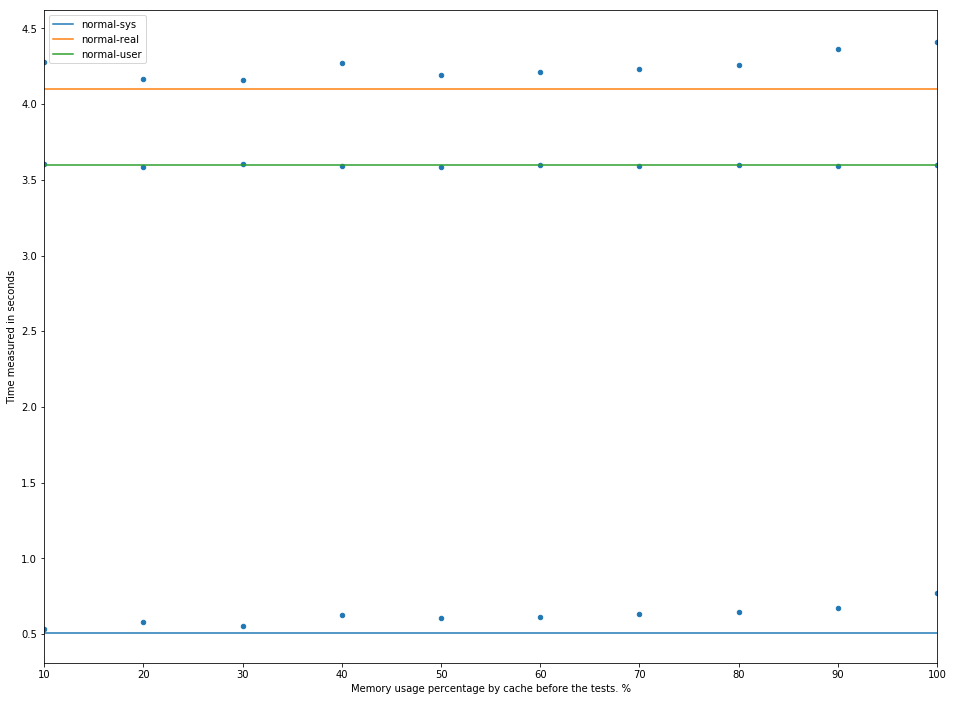

In [45]:
tt = {
    "mpressure-sys": tests['sys'],
    "mpressure-real": tests['real'],
    "mpressure-user": tests['user'],
}
test = pd.DataFrame(tt)
test['normal-sys'] = report['sys'].mean()
test['normal-real'] = report['real'].mean()
test['normal-user'] = report['user'].mean()
test['cp'] = RangeIndex(start=10, stop=110, step=10)
# test.set_index(list(range(10,110, 10)))
from pandas import RangeIndex
test.index = RangeIndex(start=10, stop=110, step=10)
# plt.figure();# test.plot(figsize=(16, 12));
ax = test[['normal-sys','normal-real', 'normal-user']].plot(figsize=(16, 12))
test.plot(ax=ax, kind='scatter', x="cp", y="mpressure-sys")
test.plot(ax=ax, kind='scatter', x="cp", y="mpressure-real")
test.plot(ax=ax, kind='scatter', x="cp", y="mpressure-user")
ax.set_ylabel("Time measured in seconds")
ax.set_xlabel("Memory usage percentage by cache before the tests. %")

In [16]:
import json
rdata = []
with open("data/10-19-248-43-2017-12") as f:
    for l in f:
        rdata.append(json.loads(l))

In [17]:
from datetime import datetime
import pandas as pd
df = pd.DataFrame(rdata,)
del df['target']
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('timestamp')
df = df[datetime(2017, 12, 16):]


In [19]:
df.columns

Index([u'ArpFilter', u'BusyPollRxPackets', u'DelayedACKLocked',
       u'DelayedACKLost', u'DelayedACKs', u'EmbryonicRsts',
       u'IPReversePathFilter', u'InBcastOctets', u'InBcastPkts', u'InCEPkts',
       ...
       u'TCPWantZeroWindowAdv', u'TCPWinProbe', u'TW', u'TWKilled',
       u'TWRecycled', u'availablememory', u'containers', u'deadprocess',
       u'slabmemory', u'zombieprocess'],
      dtype='object', length=139)

Index([u'TCPSackShiftFallback', u'TCPSpuriousRtxHostQueues', u'TCPSynRetrans',
       u'TCPTimeouts', u'TCPToZeroWindowAdv', u'TCPWantZeroWindowAdv',
       u'TWKilled', u'availablememory', u'containers', u'deadprocess'],
      dtype='object')


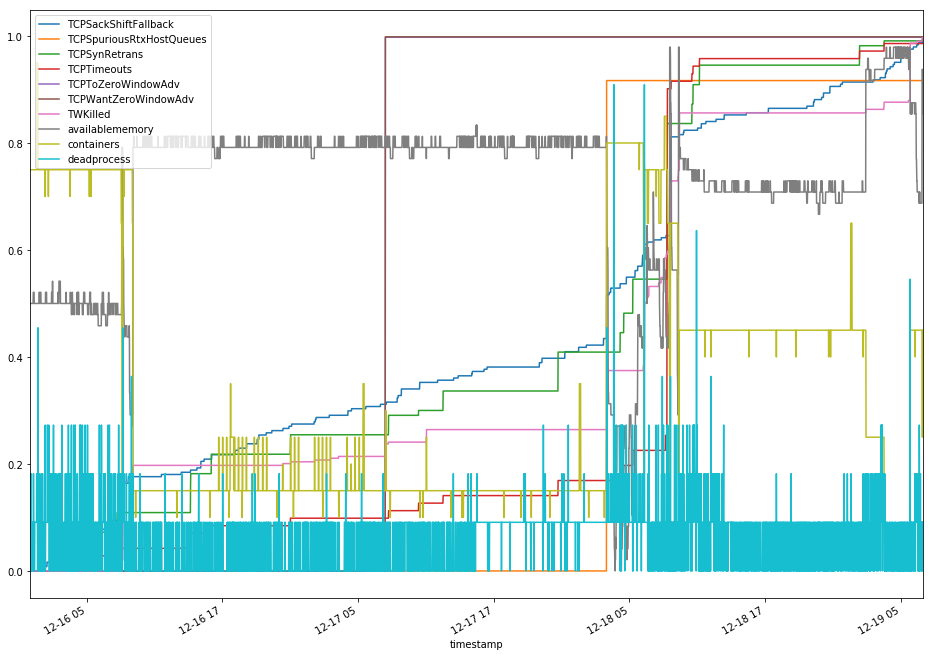

In [201]:
# del df['target']
dmax = df.max()
dmin = df.min()
tdf = (df-dmin)/(dmax-dmin+1)

tdf.columns[tdf.std()>0.001]
cc = tdf.columns[tdf.std()>0.001]
start = 40
tcc = cc[start:start+10]
print tcc
tdf[tcc].plot(figsize=(16,12))

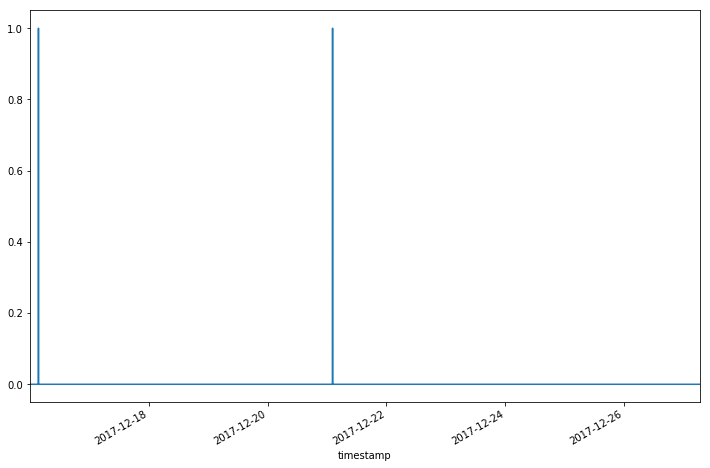

In [24]:
# print df.columns
#DelayedACKLost DelayedACKs TCPAbortOnData TCPDSACKIgnoredNoUndo TCPLossProbes TCPOFOQueue
#
df['zombieprocess'].plot(figsize=(12,8))

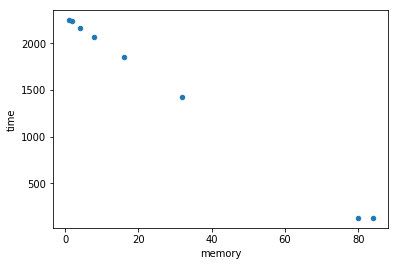

In [205]:
raw = [
    {'memory': 1, "time": 37*60+25.56},
    {'memory': 2, "time": 37*60+19.24},
    {'memory': 4, "time": 36*60+4.87},
    {'memory': 8, "time": 38*60+38.79},
    {'memory': 12, "time": 35*60+53.21}, # drop cache before test
    {'memory': 16, "time": 30*60+50.74},
    {'memory': 32, "time": 23*60+39.08},
    {'memory': 80, "time": 2*60+12.31},
    {'memory': 84, "time": 2*60+9.01},
]
df = pd.DataFrame(raw,)
df.plot.scatter("memory", "time")

In [63]:
# 1040 services
# time for c in {1..10}; do for i in {1..1000}; do echo > /dev/tcp/service-memcached-$i/11211; done; done
iptable_nodes=[
    "10.19.137.151",
"10.19.137.156",
"10.19.137.157",
"10.19.137.158",
"10.19.137.159",
"10.19.140.4",
"10.19.140.7",
"10.19.140.9",
"10.19.140.15",
    "10.19.137.148",
    "10.19.137.147",
    "10.19.137.141",
    "10.19.137.144",
    "10.19.137.145",
]

samples_1040 = [
{"node": "10.19.137.140", "real_time": 24.768, "service_count": 1040, "user_time": 0.323, "sys_time": 1.194} ,
{"node": "10.19.137.141", "real_time": 21.719, "service_count": 1040, "user_time": 0.318, "sys_time": 1.286} ,
{"node": "10.19.137.142", "real_time": 22.442, "service_count": 1040, "user_time": 0.33, "sys_time": 1.23} ,
{"node": "10.19.137.143", "real_time": 23.271, "service_count": 1040, "user_time": 0.336, "sys_time": 1.216} ,
{"node": "10.19.137.144", "real_time": 23.301, "service_count": 1040, "user_time": 0.291, "sys_time": 0.988} ,
{"node": "10.19.137.145", "real_time": 23.285, "service_count": 1040, "user_time": 0.3, "sys_time": 1.122} ,
{"node": "10.19.137.146", "real_time": 23.29, "service_count": 1040, "user_time": 0.257, "sys_time": 1.14} ,
{"node": "10.19.137.147", "real_time": 25.502, "service_count": 1040, "user_time": 1.784, "sys_time": 5.74} ,
{"node": "10.19.137.148", "real_time": 25.351, "service_count": 1040, "user_time": 1.518, "sys_time": 4.695} ,
{"node": "10.19.137.149", "real_time": 25.611, "service_count": 1040, "user_time": 1.647, "sys_time": 5.456} ,
{"node": "10.19.137.150", "real_time": 24.988, "service_count": 1040, "user_time": 1.926, "sys_time": 5.637} ,
{"node": "10.19.137.151", "real_time": 24.803, "service_count": 1040, "user_time": 0.254, "sys_time": 1.74} ,
{"node": "10.19.137.152", "real_time": 29.055, "service_count": 1040, "user_time": 0.185, "sys_time": 1.129} ,
{"node": "10.19.137.153", "real_time": 24.008, "service_count": 1040, "user_time": 0.207, "sys_time": 1.24} ,
{"node": "10.19.137.154", "real_time": 24.057, "service_count": 1040, "user_time": 0.161, "sys_time": 1.403} ,
{"node": "10.19.137.156", "real_time": 25.11, "service_count": 1040, "user_time": 0.103, "sys_time": 1.556} ,
{"node": "10.19.137.157", "real_time": 24.496, "service_count": 1040, "user_time": 0.283, "sys_time": 1.685} ,
{"node": "10.19.137.158", "real_time": 24.644, "service_count": 1040, "user_time": 0.185, "sys_time": 1.596} ,
{"node": "10.19.137.159", "real_time": 25.022, "service_count": 1040, "user_time": 0.041, "sys_time": 1.522} ,
{"node": "10.19.140.12", "real_time": 28.992, "service_count": 1040, "user_time": 0.371, "sys_time": 3.324} ,
{"node": "10.19.140.13", "real_time": 26.243, "service_count": 1040, "user_time": 0.0, "sys_time": 2.567} ,
{"node": "10.19.140.15", "real_time": 27.26, "service_count": 1040, "user_time": 0.0, "sys_time": 3.489} ,
{"node": "10.19.140.4", "real_time": 30.329, "service_count": 1040, "user_time": 0.0, "sys_time": 2.811} ,
{"node": "10.19.140.7", "real_time": 29.824, "service_count": 1040, "user_time": 0.0, "sys_time": 1.793} ,
{"node": "10.19.140.8", "real_time": 25.152, "service_count": 1040, "user_time": 0.0, "sys_time": 2.22} ,
{"node": "10.19.140.9", "real_time": 33.598, "service_count": 1040, "user_time": 0.0, "sys_time": 1.942} ,

]

samples_2080 = [
    {"node": "10.19.137.140", "real_time": 47.972, "service_count": 2080, "user_time": 0.495, "sys_time": 2.606} ,
{"node": "10.19.137.141", "real_time": 42.819, "service_count": 2080, "user_time": 0.163, "sys_time": 3.107} ,
{"node": "10.19.137.142", "real_time": 47.453, "service_count": 2080, "user_time": 0.635, "sys_time": 2.633} ,
{"node": "10.19.137.143", "real_time": 47.872, "service_count": 2080, "user_time": 0.322, "sys_time": 2.778} ,
{"node": "10.19.137.144", "real_time": 46.47, "service_count": 2080, "user_time": 0.407, "sys_time": 2.611} ,
{"node": "10.19.137.145", "real_time": 46.404, "service_count": 2080, "user_time": 0.44, "sys_time": 2.504} ,
{"node": "10.19.137.146", "real_time": 47.272, "service_count": 2080, "user_time": 0.293, "sys_time": 2.609} ,
{"node": "10.19.137.147", "real_time": 50.924, "service_count": 2080, "user_time": 3.691, "sys_time": 10.596} ,
{"node": "10.19.137.148", "real_time": 48.561, "service_count": 2080, "user_time": 2.6, "sys_time": 8.205} ,
{"node": "10.19.137.149", "real_time": 50.21, "service_count": 2080, "user_time": 3.649, "sys_time": 9.46} ,
{"node": "10.19.137.150", "real_time": 49.093, "service_count": 2080, "user_time": 2.981, "sys_time": 7.461} ,
{"node": "10.19.137.151", "real_time": 48.08, "service_count": 2080, "user_time": 0.022, "sys_time": 3.975} ,
{"node": "10.19.137.152", "real_time": 46.699, "service_count": 2080, "user_time": 0.031, "sys_time": 2.785} ,
{"node": "10.19.137.153", "real_time": 46.361, "service_count": 2080, "user_time": 0.323, "sys_time": 2.622} ,
{"node": "10.19.137.154", "real_time": 47.32, "service_count": 2080, "user_time": 0.077, "sys_time": 2.872} ,
{"node": "10.19.137.156", "real_time": 50.021, "service_count": 2080, "user_time": 0.0, "sys_time": 3.793} ,
{"node": "10.19.137.157", "real_time": 48.728, "service_count": 2080, "user_time": 0.316, "sys_time": 3.886} ,
{"node": "10.19.137.158", "real_time": 49.515, "service_count": 2080, "user_time": 0.0, "sys_time": 3.553} ,
{"node": "10.19.137.159", "real_time": 50.96, "service_count": 2080, "user_time": 0.107, "sys_time": 4.212} ,
{"node": "10.19.140.12", "real_time": 63.568, "service_count": 2080, "user_time": 0.0, "sys_time": 6.212} ,
{"node": "10.19.140.13", "real_time": 55.095, "service_count": 2080, "user_time": 0.0, "sys_time": 4.773} ,
{"node": "10.19.140.15", "real_time": 82.282, "service_count": 2080, "user_time": 0.0, "sys_time": 8.329} ,
{"node": "10.19.140.4", "real_time": 56.94, "service_count": 2080, "user_time": 0.0, "sys_time": 6.468} ,
{"node": "10.19.140.7", "real_time": 56.901, "service_count": 2080, "user_time": 0.0, "sys_time": 3.76} ,
{"node": "10.19.140.8", "real_time": 52.049, "service_count": 2080, "user_time": 0.0, "sys_time": 4.657} ,
{"node": "10.19.140.9", "real_time": 60.214, "service_count": 2080, "user_time": 0.0, "sys_time": 4.964} ,

]

samples_3120 = [
    {"node": "10.19.137.140", "real_time": 71.554, "service_count": 3120, "user_time": 0.245, "sys_time": 4.416} ,
{"node": "10.19.137.141", "real_time": 61.549, "service_count": 3120, "user_time": 0.0, "sys_time": 5.027} ,
{"node": "10.19.137.142", "real_time": 67.091, "service_count": 3120, "user_time": 0.459, "sys_time": 4.275} ,
{"node": "10.19.137.143", "real_time": 69.146, "service_count": 3120, "user_time": 0.523, "sys_time": 4.074} ,
{"node": "10.19.137.144", "real_time": 73.43299999999999, "service_count": 3120, "user_time": 0.047, "sys_time": 4.141} ,
{"node": "10.19.137.145", "real_time": 70.534, "service_count": 3120, "user_time": 0.347, "sys_time": 4.211} ,
{"node": "10.19.137.146", "real_time": 70.031, "service_count": 3120, "user_time": 0.438, "sys_time": 4.301} ,
{"node": "10.19.137.147", "real_time": 81.445, "service_count": 3120, "user_time": 4.14, "sys_time": 12.283} ,
{"node": "10.19.137.148", "real_time": 71.904, "service_count": 3120, "user_time": 3.567, "sys_time": 10.767} ,
{"node": "10.19.137.149", "real_time": 72.102, "service_count": 3120, "user_time": 3.613, "sys_time": 11.205} ,
{"node": "10.19.137.150", "real_time": 73.121, "service_count": 3120, "user_time": 4.813, "sys_time": 11.528} ,
{"node": "10.19.137.151", "real_time": 72.81, "service_count": 3120, "user_time": 0.0, "sys_time": 6.293} ,
{"node": "10.19.137.152", "real_time": 73.686, "service_count": 3120, "user_time": 0.187, "sys_time": 3.994} ,
{"node": "10.19.137.153", "real_time": 69.476, "service_count": 3120, "user_time": 0.342, "sys_time": 4.104} ,
{"node": "10.19.137.154", "real_time": 76.063, "service_count": 3120, "user_time": 0.0, "sys_time": 4.626} ,
{"node": "10.19.137.156", "real_time": 72.511, "service_count": 3120, "user_time": 0.0, "sys_time": 5.66} ,
{"node": "10.19.137.157", "real_time": 73.294, "service_count": 3120, "user_time": 0.0, "sys_time": 6.046} ,
{"node": "10.19.137.158", "real_time": 71.231, "service_count": 3120, "user_time": 0.0, "sys_time": 5.097} ,
{"node": "10.19.137.159", "real_time": 72.276, "service_count": 3120, "user_time": 0.0, "sys_time": 5.12} ,
{"node": "10.19.140.12", "real_time": 87.289, "service_count": 3120, "user_time": 0.0, "sys_time": 10.144} ,
{"node": "10.19.140.13", "real_time": 93.941, "service_count": 3120, "user_time": 0.0, "sys_time": 7.233} ,
{"node": "10.19.140.15", "real_time": 104.452, "service_count": 3120, "user_time": 0.0, "sys_time": 9.199} ,
{"node": "10.19.140.4", "real_time": 96.249, "service_count": 3120, "user_time": 0.0, "sys_time": 7.381} ,
{"node": "10.19.140.7", "real_time": 93.219, "service_count": 3120, "user_time": 0.0, "sys_time": 4.964} ,
{"node": "10.19.140.8", "real_time": 77.563, "service_count": 3120, "user_time": 0.0, "sys_time": 7.573} ,
{"node": "10.19.140.9", "real_time": 96.231, "service_count": 3120, "user_time": 0.0, "sys_time": 7.159} ,
]


In [65]:
samples_1040=[
    {"node": "10.19.137.140", "real_time": 23.92, "service_count": 1040, "user_time": 0.377, "sys_time": 1.231} ,
{"node": "10.19.137.141", "real_time": 22.42, "service_count": 1040, "user_time": 0.237, "sys_time": 1.238} ,
{"node": "10.19.137.142", "real_time": 24.154, "service_count": 1040, "user_time": 0.352, "sys_time": 1.136} ,
{"node": "10.19.137.143", "real_time": 24.125, "service_count": 1040, "user_time": 0.376, "sys_time": 1.215} ,
{"node": "10.19.137.144", "real_time": 24.105, "service_count": 1040, "user_time": 0.245, "sys_time": 1.293} ,
{"node": "10.19.137.145", "real_time": 25.5, "service_count": 1040, "user_time": 0.249, "sys_time": 1.346} ,
{"node": "10.19.137.146", "real_time": 24.43, "service_count": 1040, "user_time": 0.281, "sys_time": 1.011} ,
{"node": "10.19.137.147", "real_time": 25.38, "service_count": 1040, "user_time": 1.36, "sys_time": 5.695} ,
{"node": "10.19.137.148", "real_time": 25.212, "service_count": 1040, "user_time": 1.404, "sys_time": 5.848} ,
{"node": "10.19.137.149", "real_time": 26.398, "service_count": 1040, "user_time": 2.074, "sys_time": 5.997} ,
{"node": "10.19.137.150", "real_time": 25.401, "service_count": 1040, "user_time": 1.828, "sys_time": 5.627} ,
{"node": "10.19.137.151", "real_time": 24.763, "service_count": 1040, "user_time": 0.341, "sys_time": 1.762} ,
{"node": "10.19.137.152", "real_time": 24.676, "service_count": 1040, "user_time": 0.129, "sys_time": 1.04} ,
{"node": "10.19.137.153", "real_time": 24.368, "service_count": 1040, "user_time": 0.197, "sys_time": 1.306} ,
{"node": "10.19.137.154", "real_time": 24.575, "service_count": 1040, "user_time": 0.199, "sys_time": 1.336} ,
{"node": "10.19.137.156", "real_time": 25.478, "service_count": 1040, "user_time": 0.15, "sys_time": 1.496} ,
{"node": "10.19.137.157", "real_time": 26.662, "service_count": 1040, "user_time": 0.277, "sys_time": 1.68} ,
{"node": "10.19.137.158", "real_time": 26.459, "service_count": 1040, "user_time": 0.175, "sys_time": 1.823} ,
{"node": "10.19.137.159", "real_time": 25.23, "service_count": 1040, "user_time": 0.226, "sys_time": 1.888} ,
{"node": "10.19.140.12", "real_time": 28.778, "service_count": 1040, "user_time": 0.426, "sys_time": 3.321} ,
{"node": "10.19.140.13", "real_time": 26.386, "service_count": 1040, "user_time": 0.0, "sys_time": 2.576} ,
{"node": "10.19.140.15", "real_time": 26.99, "service_count": 1040, "user_time": 0.0, "sys_time": 3.666} ,
{"node": "10.19.140.4", "real_time": 29.689, "service_count": 1040, "user_time": 0.0, "sys_time": 3.137} ,
{"node": "10.19.140.7", "real_time": 26.79, "service_count": 1040, "user_time": 0.0, "sys_time": 2.734} ,
{"node": "10.19.140.8", "real_time": 26.356, "service_count": 1040, "user_time": 0.029, "sys_time": 2.446} ,
{"node": "10.19.140.9", "real_time": 26.678, "service_count": 1040, "user_time": 0.0, "sys_time": 2.794} ,

]

In [70]:

samples_2080=[
    {"node": "10.19.137.140", "real_time": 47.653, "service_count": 2080, "user_time": 0.436, "sys_time": 2.804} ,
{"node": "10.19.137.141", "real_time": 47.54, "service_count": 2080, "user_time": 0.0, "sys_time": 3.052} ,
{"node": "10.19.137.142", "real_time": 54.882, "service_count": 2080, "user_time": 0.404, "sys_time": 2.973} ,
{"node": "10.19.137.143", "real_time": 50.582, "service_count": 2080, "user_time": 0.362, "sys_time": 2.819} ,
{"node": "10.19.137.144", "real_time": 55.647, "service_count": 2080, "user_time": 0.0, "sys_time": 3.153} ,
{"node": "10.19.137.145", "real_time": 66.409, "service_count": 2080, "user_time": 0.0, "sys_time": 3.067} ,
{"node": "10.19.137.146", "real_time": 71.254, "service_count": 2080, "user_time": 0.286, "sys_time": 2.615} ,
{"node": "10.19.137.147", "real_time": 52.675, "service_count": 2080, "user_time": 3.196, "sys_time": 14.408} ,
{"node": "10.19.137.148", "real_time": 56.388, "service_count": 2080, "user_time": 2.422, "sys_time": 11.095} ,
{"node": "10.19.137.149", "real_time": 53.776, "service_count": 2080, "user_time": 3.707, "sys_time": 10.072} ,
{"node": "10.19.137.150", "real_time": 51.867, "service_count": 2080, "user_time": 3.965, "sys_time": 10.267} ,
{"node": "10.19.137.151", "real_time": 50.584, "service_count": 2080, "user_time": 0.233, "sys_time": 3.971} ,
{"node": "10.19.137.152", "real_time": 50.547, "service_count": 2080, "user_time": 0.08, "sys_time": 2.82} ,
{"node": "10.19.137.153", "real_time": 54.392, "service_count": 2080, "user_time": 0.288, "sys_time": 2.791} ,
{"node": "10.19.137.154", "real_time": 54.664, "service_count": 2080, "user_time": 0.354, "sys_time": 2.802} ,
{"node": "10.19.137.156", "real_time": 54.154, "service_count": 2080, "user_time": 0.249, "sys_time": 3.911} ,
{"node": "10.19.137.157", "real_time": 50.187, "service_count": 2080, "user_time": 0.0, "sys_time": 4.319} ,
{"node": "10.19.137.158", "real_time": 53.055, "service_count": 2080, "user_time": 0.0, "sys_time": 4.165} ,
{"node": "10.19.137.159", "real_time": 54.488, "service_count": 2080, "user_time": 0.0, "sys_time": 3.596} ,
{"node": "10.19.140.12", "real_time": 56.401, "service_count": 2080, "user_time": 0.0, "sys_time": 6.938} ,
{"node": "10.19.140.13", "real_time": 58.371, "service_count": 2080, "user_time": 0.0, "sys_time": 4.322} ,
{"node": "10.19.140.15", "real_time": 57.173, "service_count": 2080, "user_time": 0.0, "sys_time": 7.967} ,
{"node": "10.19.140.4", "real_time": 72.4, "service_count": 2080, "user_time": 0.0, "sys_time": 3.991} ,
{"node": "10.19.140.7", "real_time": 54.363, "service_count": 2080, "user_time": 0.0, "sys_time": 6.059} ,
{"node": "10.19.140.8", "real_time": 55.33, "service_count": 2080, "user_time": 0.0, "sys_time": 5.202} ,
{"node": "10.19.140.9", "real_time": 60.051, "service_count": 2080, "user_time": 0.0, "sys_time": 4.093} ,
]

In [97]:
samples_3120=[
{"node": "10.19.137.141", "real_time": 69.582, "service_count": 3120, "user_time": 0.0, "sys_time": 4.471} ,
{"node": "10.19.137.142", "real_time": 74.467, "service_count": 3120, "user_time": 0.289, "sys_time": 4.584} ,
{"node": "10.19.137.143", "real_time": 77.524, "service_count": 3120, "user_time": 0.037, "sys_time": 4.661} ,
{"node": "10.19.137.144", "real_time": 80.517, "service_count": 3120, "user_time": 0.0, "sys_time": 4.88} ,
{"node": "10.19.137.145", "real_time": 77.724, "service_count": 3120, "user_time": 0.0, "sys_time": 4.923} ,
{"node": "10.19.137.146", "real_time": 77.548, "service_count": 3120, "user_time": 0.059, "sys_time": 4.366} ,
{"node": "10.19.137.147", "real_time": 80.151, "service_count": 3120, "user_time": 4.139, "sys_time": 19.909} ,
{"node": "10.19.137.148", "real_time": 79.943, "service_count": 3120, "user_time": 3.199, "sys_time": 14.595} ,
{"node": "10.19.137.149", "real_time": 79.61, "service_count": 3120, "user_time": 4.511, "sys_time": 13.372} ,
{"node": "10.19.137.150", "real_time": 76.281, "service_count": 3120, "user_time": 4.852, "sys_time": 12.4} ,
{"node": "10.19.137.151", "real_time": 204.734, "service_count": 3120, "user_time": 0.124, "sys_time": 6.457} ,
{"node": "10.19.137.152", "real_time": 77.376, "service_count": 3120, "user_time": 0.064, "sys_time": 4.374} ,
{"node": "10.19.137.153", "real_time": 73.373, "service_count": 3120, "user_time": 0.243, "sys_time": 4.492} ,
{"node": "10.19.137.154", "real_time": 73.294, "service_count": 3120, "user_time": 0.587, "sys_time": 4.308} ,
{"node": "10.19.137.156", "real_time": 77.712, "service_count": 3120, "user_time": 0.0, "sys_time": 6.607} ,
{"node": "10.19.137.157", "real_time": 75.339, "service_count": 3120, "user_time": 0.0, "sys_time": 6.261} ,
{"node": "10.19.137.158", "real_time": 76.245, "service_count": 3120, "user_time": 0.0, "sys_time": 5.654} ,
{"node": "10.19.137.159", "real_time": 81.513, "service_count": 3120, "user_time": 0.0, "sys_time": 5.55} ,
{"node": "10.19.140.12", "real_time": 109.39099999999999, "service_count": 3120, "user_time": 0.0, "sys_time": 9.378} ,
{"node": "10.19.140.13", "real_time": 182.88, "service_count": 3120, "user_time": 0.0, "sys_time": 7.897} ,
{"node": "10.19.140.15", "real_time": 214.312, "service_count": 3120, "user_time": 0.0, "sys_time": 11.312} ,
{"node": "10.19.140.4", "real_time": 193.584, "service_count": 3120, "user_time": 0.0, "sys_time": 8.155} ,
{"node": "10.19.140.7", "real_time": 151.334, "service_count": 3120, "user_time": 0.0, "sys_time": 6.568} ,
{"node": "10.19.140.8", "real_time": 137.423, "service_count": 3120, "user_time": 0.0, "sys_time": 8.708} ,
{"node": "10.19.140.9", "real_time": 129.19, "service_count": 3120, "user_time": 0.0, "sys_time": 10.263} ,
    {"node": "10.19.137.140", "real_time": 78.463, "service_count": 3120, "user_time": 0.757, "sys_time": 4.281} ,
{"node": "10.19.137.141", "real_time": 88.69, "service_count": 3120, "user_time": 0.0, "sys_time": 4.747} ,
{"node": "10.19.137.142", "real_time": 72.885, "service_count": 3120, "user_time": 0.469, "sys_time": 4.383} ,
{"node": "10.19.137.143", "real_time": 78.632, "service_count": 3120, "user_time": 0.0, "sys_time": 4.66} ,
{"node": "10.19.137.144", "real_time": 76.885, "service_count": 3120, "user_time": 0.0, "sys_time": 4.256} ,
{"node": "10.19.137.145", "real_time": 79.399, "service_count": 3120, "user_time": 0.0, "sys_time": 4.733} ,
{"node": "10.19.137.146", "real_time": 79.355, "service_count": 3120, "user_time": 0.366, "sys_time": 4.022} ,
{"node": "10.19.137.147", "real_time": 98.244, "service_count": 3120, "user_time": 5.77, "sys_time": 23.287} ,
{"node": "10.19.137.148", "real_time": 81.11, "service_count": 3120, "user_time": 3.652, "sys_time": 12.993} ,
{"node": "10.19.137.149", "real_time": 82.115, "service_count": 3120, "user_time": 4.081, "sys_time": 12.24} ,
{"node": "10.19.137.150", "real_time": 77.32300000000001, "service_count": 3120, "user_time": 4.968, "sys_time": 13.942} ,
{"node": "10.19.137.151", "real_time": 80.205, "service_count": 3120, "user_time": 0.057, "sys_time": 6.94} ,
{"node": "10.19.137.152", "real_time": 73.686, "service_count": 3120, "user_time": 0.503, "sys_time": 3.969} ,
{"node": "10.19.137.153", "real_time": 75.482, "service_count": 3120, "user_time": 0.5, "sys_time": 4.288} ,
{"node": "10.19.137.154", "real_time": 77.945, "service_count": 3120, "user_time": 0.003, "sys_time": 4.834} ,
{"node": "10.19.137.156", "real_time": 76.736, "service_count": 3120, "user_time": 0.0, "sys_time": 6.229} ,
{"node": "10.19.137.157", "real_time": 80.62, "service_count": 3120, "user_time": 0.0, "sys_time": 6.066} ,
{"node": "10.19.137.158", "real_time": 80.804, "service_count": 3120, "user_time": 0.0, "sys_time": 6.219} ,
{"node": "10.19.137.159", "real_time": 81.91, "service_count": 3120, "user_time": 0.0, "sys_time": 6.131} ,
{"node": "10.19.140.12", "real_time": 87.4, "service_count": 3120, "user_time": 0.0, "sys_time": 7.367} ,
{"node": "10.19.140.13", "real_time": 82.184, "service_count": 3120, "user_time": 0.0, "sys_time": 6.92} ,
{"node": "10.19.140.15", "real_time": 103.81, "service_count": 3120, "user_time": 0.0, "sys_time": 7.759} ,
{"node": "10.19.140.4", "real_time": 86.492, "service_count": 3120, "user_time": 0.0, "sys_time": 8.238} ,
{"node": "10.19.140.7", "real_time": 89.886, "service_count": 3120, "user_time": 0.0, "sys_time": 4.973} ,
{"node": "10.19.140.8", "real_time": 79.944, "service_count": 3120, "user_time": 0.0, "sys_time": 7.777} ,
{"node": "10.19.140.9", "real_time": 99.033, "service_count": 3120, "user_time": 0.0, "sys_time": 7.01} ,
    {"node": "10.19.137.140", "real_time": 76.608, "service_count": 3120, "user_time": 0.545, "sys_time": 4.492} ,
{"node": "10.19.137.141", "real_time": 63.414, "service_count": 3120, "user_time": 0.0, "sys_time": 5.689} ,
{"node": "10.19.137.142", "real_time": 75.581, "service_count": 3120, "user_time": 0.436, "sys_time": 4.556} ,
{"node": "10.19.137.143", "real_time": 82.557, "service_count": 3120, "user_time": 0.52, "sys_time": 4.523} ,
{"node": "10.19.137.144", "real_time": 87.78999999999999, "service_count": 3120, "user_time": 0.0, "sys_time": 4.375} ,
{"node": "10.19.137.145", "real_time": 74.184, "service_count": 3120, "user_time": 0.0, "sys_time": 4.779} ,
{"node": "10.19.137.146", "real_time": 73.094, "service_count": 3120, "user_time": 0.0, "sys_time": 4.256} ,
{"node": "10.19.137.147", "real_time": 85.196, "service_count": 3120, "user_time": 4.446, "sys_time": 21.902} ,
{"node": "10.19.137.148", "real_time": 75.493, "service_count": 3120, "user_time": 4.064, "sys_time": 16.172} ,
{"node": "10.19.137.149", "real_time": 76.506, "service_count": 3120, "user_time": 3.924, "sys_time": 12.792} ,
{"node": "10.19.137.150", "real_time": 77.111, "service_count": 3120, "user_time": 4.678, "sys_time": 12.815} ,
{"node": "10.19.137.151", "real_time": 76.035, "service_count": 3120, "user_time": 0.11, "sys_time": 6.979} ,
{"node": "10.19.137.152", "real_time": 72.31700000000001, "service_count": 3120, "user_time": 0.0, "sys_time": 4.282} ,
{"node": "10.19.137.153", "real_time": 72.554, "service_count": 3120, "user_time": 0.093, "sys_time": 4.459} ,
{"node": "10.19.137.154", "real_time": 80.374, "service_count": 3120, "user_time": 0.191, "sys_time": 4.637} ,
{"node": "10.19.137.156", "real_time": 76.646, "service_count": 3120, "user_time": 0.0, "sys_time": 6.503} ,
{"node": "10.19.137.157", "real_time": 76.13, "service_count": 3120, "user_time": 0.0, "sys_time": 6.137} ,
{"node": "10.19.137.158", "real_time": 73.812, "service_count": 3120, "user_time": 0.0, "sys_time": 5.572} ,
{"node": "10.19.137.159", "real_time": 77.455, "service_count": 3120, "user_time": 0.0, "sys_time": 6.173} ,
{"node": "10.19.140.12", "real_time": 77.01599999999999, "service_count": 3120, "user_time": 0.0, "sys_time": 6.277} ,
{"node": "10.19.140.13", "real_time": 77.904, "service_count": 3120, "user_time": 0.0, "sys_time": 6.217} ,
{"node": "10.19.140.15", "real_time": 110.825, "service_count": 3120, "user_time": 0.0, "sys_time": 6.674} ,
{"node": "10.19.140.4", "real_time": 98.0, "service_count": 3120, "user_time": 0.0, "sys_time": 5.755} ,
{"node": "10.19.140.7", "real_time": 80.57, "service_count": 3120, "user_time": 0.0, "sys_time": 6.137} ,
{"node": "10.19.140.8", "real_time": 73.81, "service_count": 3120, "user_time": 0.0, "sys_time": 7.857} ,
{"node": "10.19.140.9", "real_time": 92.43299999999999, "service_count": 3120, "user_time": 0.0, "sys_time": 7.476} ,
    {"node": "10.19.137.140", "real_time": 72.562, "service_count": 3120, "user_time": 0.583, "sys_time": 4.384} ,
{"node": "10.19.137.141", "real_time": 68.262, "service_count": 3120, "user_time": 0.0, "sys_time": 4.488} ,
{"node": "10.19.137.142", "real_time": 82.82300000000001, "service_count": 3120, "user_time": 0.276, "sys_time": 4.508} ,
{"node": "10.19.137.143", "real_time": 77.131, "service_count": 3120, "user_time": 0.13, "sys_time": 4.619} ,
{"node": "10.19.137.144", "real_time": 78.498, "service_count": 3120, "user_time": 0.0, "sys_time": 4.705} ,
{"node": "10.19.137.145", "real_time": 81.074, "service_count": 3120, "user_time": 0.0, "sys_time": 4.501} ,
{"node": "10.19.137.146", "real_time": 78.273, "service_count": 3120, "user_time": 0.0, "sys_time": 4.116} ,
{"node": "10.19.137.147", "real_time": 78.282, "service_count": 3120, "user_time": 4.747, "sys_time": 24.314} ,
{"node": "10.19.137.148", "real_time": 79.631, "service_count": 3120, "user_time": 3.522, "sys_time": 15.142} ,
{"node": "10.19.137.149", "real_time": 79.584, "service_count": 3120, "user_time": 4.744, "sys_time": 12.463} ,
{"node": "10.19.137.150", "real_time": 75.384, "service_count": 3120, "user_time": 5.107, "sys_time": 12.775} ,
{"node": "10.19.137.151", "real_time": 92.476, "service_count": 3120, "user_time": 0.0, "sys_time": 4.985} ,
{"node": "10.19.137.152", "real_time": 86.977, "service_count": 3120, "user_time": 0.059, "sys_time": 4.296} ,
{"node": "10.19.137.153", "real_time": 73.016, "service_count": 3120, "user_time": 0.139, "sys_time": 4.54} ,
{"node": "10.19.137.154", "real_time": 77.987, "service_count": 3120, "user_time": 0.096, "sys_time": 4.884} ,
{"node": "10.19.137.156", "real_time": 78.825, "service_count": 3120, "user_time": 0.0, "sys_time": 6.322} ,
{"node": "10.19.137.157", "real_time": 76.881, "service_count": 3120, "user_time": 0.0, "sys_time": 6.353} ,
{"node": "10.19.137.158", "real_time": 75.364, "service_count": 3120, "user_time": 0.0, "sys_time": 5.452} ,
{"node": "10.19.137.159", "real_time": 75.929, "service_count": 3120, "user_time": 0.0, "sys_time": 5.53} ,
{"node": "10.19.140.12", "real_time": 108.936, "service_count": 3120, "user_time": 0.0, "sys_time": 6.016} ,
    {"node": "10.19.137.140", "real_time": 72.562, "service_count": 3120, "user_time": 0.583, "sys_time": 4.384} ,
{"node": "10.19.137.141", "real_time": 68.262, "service_count": 3120, "user_time": 0.0, "sys_time": 4.488} ,
{"node": "10.19.137.142", "real_time": 82.82300000000001, "service_count": 3120, "user_time": 0.276, "sys_time": 4.508} ,
{"node": "10.19.137.143", "real_time": 77.131, "service_count": 3120, "user_time": 0.13, "sys_time": 4.619} ,
{"node": "10.19.137.144", "real_time": 78.498, "service_count": 3120, "user_time": 0.0, "sys_time": 4.705} ,
{"node": "10.19.137.145", "real_time": 81.074, "service_count": 3120, "user_time": 0.0, "sys_time": 4.501} ,
{"node": "10.19.137.146", "real_time": 78.273, "service_count": 3120, "user_time": 0.0, "sys_time": 4.116} ,
{"node": "10.19.137.147", "real_time": 78.282, "service_count": 3120, "user_time": 4.747, "sys_time": 24.314} ,
{"node": "10.19.137.148", "real_time": 79.631, "service_count": 3120, "user_time": 3.522, "sys_time": 15.142} ,
{"node": "10.19.137.149", "real_time": 79.584, "service_count": 3120, "user_time": 4.744, "sys_time": 12.463} ,
{"node": "10.19.137.150", "real_time": 75.384, "service_count": 3120, "user_time": 5.107, "sys_time": 12.775} ,
{"node": "10.19.137.151", "real_time": 92.476, "service_count": 3120, "user_time": 0.0, "sys_time": 4.985} ,
{"node": "10.19.137.152", "real_time": 86.977, "service_count": 3120, "user_time": 0.059, "sys_time": 4.296} ,
{"node": "10.19.137.153", "real_time": 73.016, "service_count": 3120, "user_time": 0.139, "sys_time": 4.54} ,
{"node": "10.19.137.154", "real_time": 77.987, "service_count": 3120, "user_time": 0.096, "sys_time": 4.884} ,
{"node": "10.19.137.156", "real_time": 78.825, "service_count": 3120, "user_time": 0.0, "sys_time": 6.322} ,
{"node": "10.19.137.157", "real_time": 76.881, "service_count": 3120, "user_time": 0.0, "sys_time": 6.353} ,
{"node": "10.19.137.158", "real_time": 75.364, "service_count": 3120, "user_time": 0.0, "sys_time": 5.452} ,
{"node": "10.19.137.159", "real_time": 75.929, "service_count": 3120, "user_time": 0.0, "sys_time": 5.53} ,
{"node": "10.19.140.12", "real_time": 108.936, "service_count": 3120, "user_time": 0.0, "sys_time": 6.016} ,
]

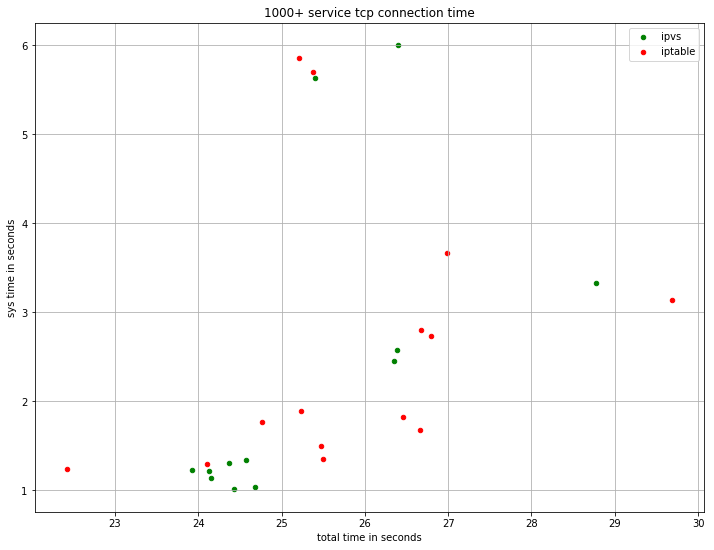

In [75]:
for i in samples_1040:
    if i['node'] in iptable_nodes:
        i['kube-proxy-type'] = 0
    else:
        i['kube-proxy-type'] = 1
df = pd.DataFrame(samples_1040)
ipvs = df[df['kube-proxy-type'] == 1]
iptables = df[df['kube-proxy-type'] == 0]
ax = ipvs.plot(kind='scatter', x='real_time', y='sys_time', color='Green', label='ipvs', figsize=(12,9), title="1000+ service tcp connection time")
iptables.plot(kind='scatter', x='real_time', y='sys_time', color='Red', label='iptable', ax=ax);
ax.set_ylabel("sys time in seconds")
ax.set_xlabel("total time in seconds")
ax.grid('on')

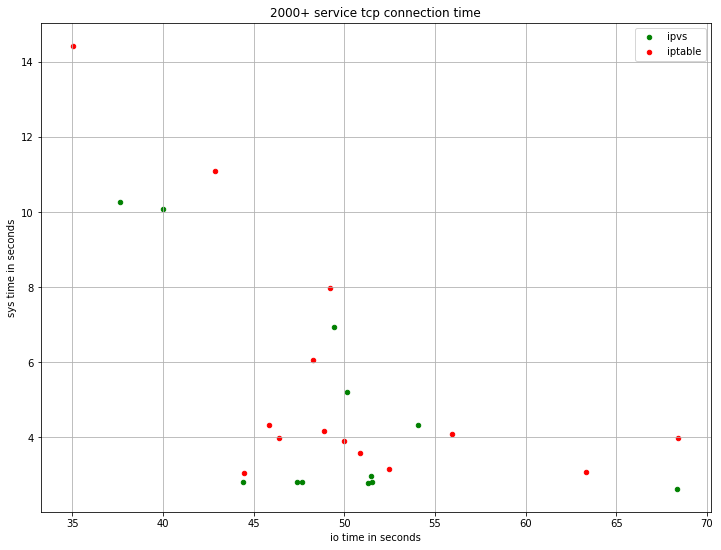

In [74]:
source = samples_2080
for i in source:
    if i['node'] in iptable_nodes:
        i['kube-proxy-type'] = 0
    else:
        i['kube-proxy-type'] = 1
df = pd.DataFrame(source)
df['io_time'] = df['real_time']-df['sys_time']-df['user_time']
ipvs = df[df['kube-proxy-type'] == 1]
iptables = df[df['kube-proxy-type'] == 0]
ax = ipvs.plot(kind='scatter', x='io_time', y='sys_time', color='Green', label='ipvs', figsize=(12,9), title="2000+ service tcp connection time")
iptables.plot(kind='scatter', x='io_time', y='sys_time', color='Red', label='iptable', ax=ax);
ax.set_ylabel("sys time in seconds")
ax.set_xlabel("io time in seconds")
ax.grid('on')

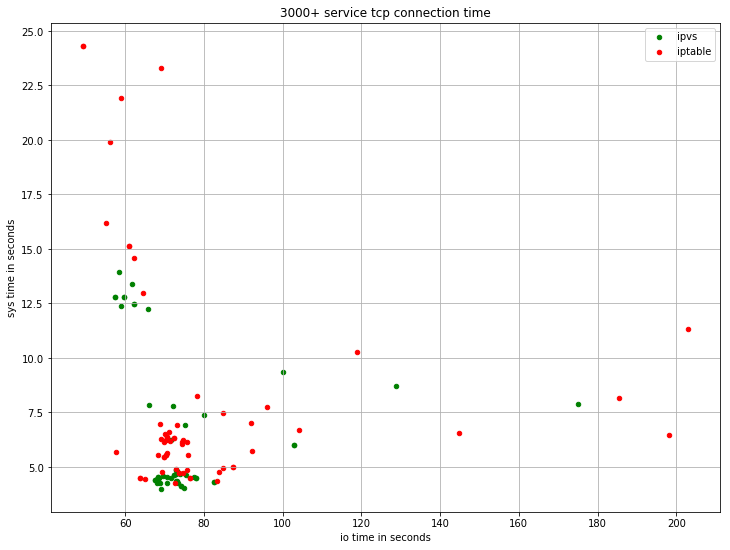

In [98]:
source = samples_3120
for i in source:
    if i['node'] in iptable_nodes:
        i['kube-proxy-type'] = 0
    else:
        i['kube-proxy-type'] = 1
df = pd.DataFrame(source)
df['io_time'] = df['real_time']-df['sys_time']-df['user_time']
ipvs = df[df['kube-proxy-type'] == 1]
iptables = df[df['kube-proxy-type'] == 0]
ax = ipvs.plot(kind='scatter', x='io_time', y='sys_time', color='Green', label='ipvs', figsize=(12,9), title="3000+ service tcp connection time")
iptables.plot(kind='scatter', x='io_time', y='sys_time', color='Red', label='iptable', ax=ax);
ax.set_ylabel("sys time in seconds")
ax.set_xlabel("io time in seconds")
ax.grid('on')

In [105]:
with open('data/hostpathpv2.txt') as f:
    t = f.read()
import re
p1 = re.compile("pod is running ([\d\.]+)")
p2 = re.compile("pod deleted ([\d\.]+)")
p3 = re.compile("([\d\.]+) myfiopvc Bound")
td1 = p1.findall(t)
td2 = p2.findall(t)
td3 = p3.findall(t)
d1 = [float(i) for i in td1]
d2 = [float(i) for i in td2]
d3 = [float(i) for i in td3]
print len(d1), len(d2), len(d3)

70 70 70


In [109]:
df = pd.DataFrame({'creating':d1, 'deleting':d2, "bounding": d3})
# df['bound'] = d3
df.describe()
# ax = df.plot(kind='scatter', x='creating', y='bounding', figsize=(18,12))
# ax.set_xlabel("pos creating time in seconds")
# ax.set_ylabel("pos deleting time in seconds")

,bounding,creating,deleting
count,70.000000,70.000000,70.000000
mean,6.732838,7.835631,121.764096
std,6.506598,1.451564,31.350777
min,1.004473,6.036587,83.118040
25%,1.016442,7.110184,95.657339
50%,4.596166,7.243811,111.206022
75%,11.203187,8.219682,128.722082
max,21.510120,14.292767,185.748772


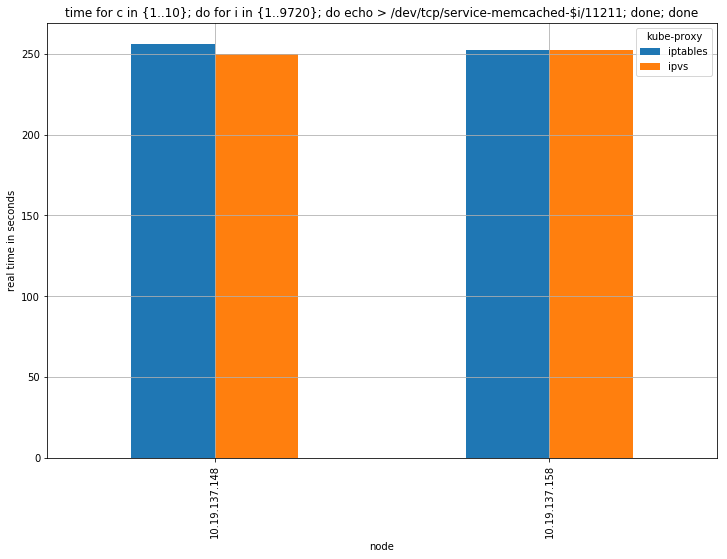

In [153]:
rdata = [
    {"node": "10.19.137.140", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 7.342, "real_time": 103.565, "user_time": 0.0} ,
{"node": "10.19.137.144", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 6.673, "real_time": 120.86, "user_time": 0.0} ,
{"node": "10.19.137.147", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 25.427, "real_time": 114.66499999999999, "user_time": 5.214} ,
{"node": "10.19.137.151", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 9.782, "real_time": 110.098, "user_time": 0.0} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 7.426, "real_time": 102.23400000000001, "user_time": 0.0} ,
{"node": "10.19.140.7", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 5.771, "real_time": 128.164, "user_time": 0.0} ,
{"node": "10.19.140.9", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 8.436, "real_time": 148.078, "user_time": 0.0} ,
{"node": "10.19.137.140", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.964, "real_time": 102.857, "user_time": 0.031} ,
{"node": "10.19.137.144", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.515, "real_time": 102.563, "user_time": 0.083} ,
{"node": "10.19.137.147", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 10.713, "real_time": 107.47800000000001, "user_time": 4.629} ,
{"node": "10.19.137.151", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 5.947, "real_time": 100.033, "user_time": 2.083} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.896, "real_time": 101.195, "user_time": 2.9} ,
{"node": "10.19.140.7", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 9.468, "real_time": 110.451, "user_time": 0.0} ,
{"node": "10.19.140.9", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 12.54, "real_time": 109.584, "user_time": 0.0} ,
{"node": "10.19.137.140", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.756, "real_time": 99.91, "user_time": 0.238} ,
{"node": "10.19.137.144", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.78, "real_time": 101.513, "user_time": 0.118} ,
{"node": "10.19.137.147", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 11.984, "real_time": 103.11099999999999, "user_time": 4.865} ,
{"node": "10.19.137.151", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.348, "real_time": 106.22800000000001, "user_time": 1.622} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.956, "real_time": 106.967, "user_time": 3.08} ,
{"node": "10.19.140.7", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 9.497, "real_time": 114.626, "user_time": 0.0} ,
{"node": "10.19.140.9", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 13.479, "real_time": 109.12100000000001, "user_time": 0.0} ,
{"node": "10.19.137.140", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.927, "real_time": 102.28999999999999, "user_time": 0.082} ,
{"node": "10.19.137.144", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 5.947, "real_time": 99.743, "user_time": 0.419} ,
{"node": "10.19.137.147", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 13.116, "real_time": 103.87700000000001, "user_time": 5.16} ,
{"node": "10.19.137.151", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 6.374, "real_time": 104.80199999999999, "user_time": 1.719} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 7.47, "real_time": 104.68299999999999, "user_time": 2.315} ,
{"node": "10.19.140.7", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 9.748, "real_time": 112.069, "user_time": 0.0} ,
{"node": "10.19.140.9", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 13.223, "real_time": 112.417, "user_time": 0.0} ,
    
    {"node": "10.19.137.140", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 6.95, "real_time": 104.804, "user_time": 0.0} ,
{"node": "10.19.137.144", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 6.637, "real_time": 102.13, "user_time": 0.0} ,
{"node": "10.19.137.147", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 25.139, "real_time": 107.787, "user_time": 4.807} ,
{"node": "10.19.137.151", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 9.336, "real_time": 105.218, "user_time": 0.0} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 10.042, "real_time": 108.076, "user_time": 0.0} ,
{"node": "10.19.140.7", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 6.857, "real_time": 128.595, "user_time": 0.0} ,
{"node": "10.19.140.9", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 10.211, "real_time": 131.125, "user_time": 0.0} ,
{"node": "10.19.137.140", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 7.359, "real_time": 105.569, "user_time": 0.0} ,
{"node": "10.19.137.144", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 6.464, "real_time": 104.852, "user_time": 0.0} ,
{"node": "10.19.137.147", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 25.39, "real_time": 107.476, "user_time": 4.689} ,
{"node": "10.19.137.151", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 9.27, "real_time": 106.161, "user_time": 0.0} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 10.238, "real_time": 113.37700000000001, "user_time": 0.0} ,
{"node": "10.19.140.7", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 6.766, "real_time": 126.278, "user_time": 0.0} ,
{"node": "10.19.140.9", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 13.946, "real_time": 129.674, "user_time": 0.0} ,

    {"node": "10.19.137.148", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 23.422, "real_time": 109.892, "user_time": 6.463} ,
{"node": "10.19.137.159", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 8.238, "real_time": 104.673, "user_time": 0.0} ,
{"node": "10.19.140.15", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 8.357, "real_time": 160.60399999999998, "user_time": 0.0} ,
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 12.173, "real_time": 103.612, "user_time": 4.51} ,
{"node": "10.19.137.159", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 7.563, "real_time": 105.979, "user_time": 1.981} ,
{"node": "10.19.140.15", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 12.906, "real_time": 109.96000000000001, "user_time": 0.0} ,
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 13.17, "real_time": 106.14500000000001, "user_time": 4.907} ,
{"node": "10.19.137.159", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 7.416, "real_time": 103.05199999999999, "user_time": 2.503} ,
{"node": "10.19.140.15", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 13.116, "real_time": 116.131, "user_time": 0.0} ,
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 11.667, "real_time": 104.22800000000001, "user_time": 4.753} ,
{"node": "10.19.137.159", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 7.012, "real_time": 105.33, "user_time": 2.852} ,
{"node": "10.19.140.15", "kube-proxy": "ipvs", "service_count": 4320, "sys_time": 12.933, "real_time": 112.87299999999999, "user_time": 0.0} ,
    
    {"node": "10.19.137.148", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 22.928, "real_time": 111.352, "user_time": 4.682} ,
{"node": "10.19.137.159", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 9.655, "real_time": 103.95400000000001, "user_time": 0.0} ,
{"node": "10.19.140.15", "kube-proxy": "iptables", "service_count": 4320, "sys_time": 9.214, "real_time": 142.293, "user_time": 0.0} ,
]
rdata2 = [
    # {"node": "10.19.137.140", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 14.765, "real_time": 250.891, "user_time": 1.721} ,
{"node": "10.19.137.148", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 74.81, "real_time": 256.394, "user_time": 8.814} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 16.827, "real_time": 246.476, "user_time": 2.22} ,
# {"node": "10.19.140.8", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 20.273, "real_time": 357.661, "user_time": 1.906} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 18.92, "real_time": 252.73, "user_time": 5.915} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 17.618, "real_time": 251.662, "user_time": 5.347} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 17.85, "real_time": 258.778, "user_time": 2.286} ,
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 16.91, "real_time": 250.592, "user_time": 5.394} ,
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 21.86, "real_time": 249.289, "user_time": 6.487} ,

]
df = pd.DataFrame(rdata2)
df['io_time'] = df['real_time']-df['sys_time']-df['user_time']
df['non_io_time'] = df['sys_time']+df['user_time']
tdf = df[['node', 'kube-proxy', "real_time"]]
ttdf = tdf.groupby(['node', 'kube-proxy']).mean().reset_index()
ax = ttdf.pivot(index='node', columns='kube-proxy', values='real_time').plot(kind='bar', figsize=(12,8),
 title="time for c in {1..10}; do for i in {1..9720}; do echo > /dev/tcp/service-memcached-$i/11211; done; done")
ax.set_ylabel("real time in seconds")
ax.grid('on')

In [ ]:
{"node": "10.19.137.140", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 14.765, "real_time": 250.891, "user_time": 1.721} ,
{"node": "10.19.137.148", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 74.81, "real_time": 256.394, "user_time": 8.814} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 16.827, "real_time": 246.476, "user_time": 2.22} ,
{"node": "10.19.140.8", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 20.273, "real_time": 357.661, "user_time": 1.906} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 18.92, "real_time": 252.73, "user_time": 5.915} ,
{"node": "10.19.137.158", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 17.618, "real_time": 251.662, "user_time": 5.347} ,
{"node": "10.19.137.158", "kube-proxy": "iptables", "service_count": 9720, "sys_time": 17.85, "real_time": 258.778, "user_time": 2.286} 
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 16.91, "real_time": 250.592, "user_time": 5.394} ,
{"node": "10.19.137.148", "kube-proxy": "ipvs", "service_count": 9720, "sys_time": 21.86, "real_time": 249.289, "user_time": 6.487} ,


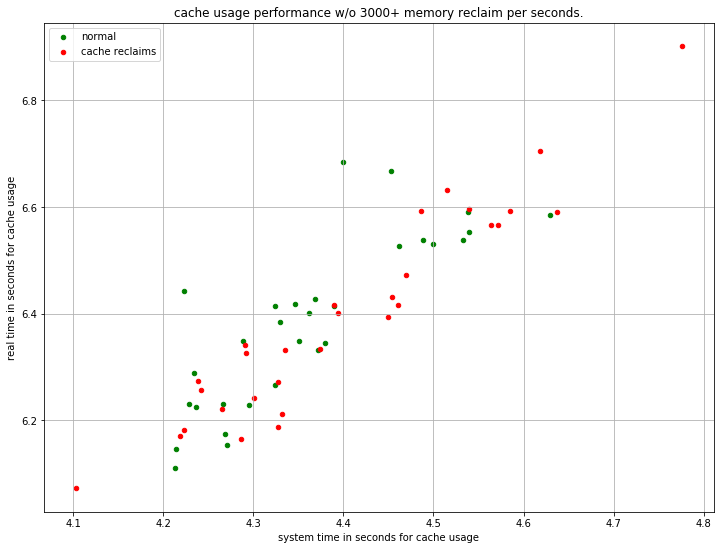

In [12]:
import re
patterns = { 'real': re.compile("real\s+(\d+)m([.\d]+)s"),
'user': re.compile("user\s+(\d+)m([.\d]+)s"),
'sys': re.compile("sys\s+(\d+)m([.\d]+)s")}

rnormal = """
real	0m6.538s
user	0m2.004s
sys	0m4.533s
4096

real	0m6.266s
user	0m1.941s
sys	0m4.324s
4096

real	0m6.667s
user	0m2.213s
sys	0m4.453s
4096

real	0m6.428s
user	0m2.059s
sys	0m4.368s
4096

real	0m6.225s
user	0m1.988s
sys	0m4.236s
4096

real	0m6.384s
user	0m2.054s
sys	0m4.329s
4096

real	0m6.443s
user	0m2.219s
sys	0m4.223s
4096

real	0m6.230s
user	0m1.963s
sys	0m4.266s
4096

real	0m6.344s
user	0m1.964s
sys	0m4.379s
4096

real	0m6.349s
user	0m2.059s
sys	0m4.288s
4096

real	0m6.153s
user	0m1.882s
sys	0m4.271s
4096

real	0m6.146s
user	0m1.932s
sys	0m4.214s
4096

real	0m6.231s
user	0m2.001s
sys	0m4.229s
4096

real	0m6.414s
user	0m2.089s
sys	0m4.324s
4096

real	0m6.585s
user	0m1.955s
sys	0m4.629s
4096

real	0m6.538s
user	0m2.050s
sys	0m4.488s
4096

real	0m6.553s
user	0m2.012s
sys	0m4.540s
4096

real	0m6.415s
user	0m2.025s
sys	0m4.389s
4096

real	0m6.229s
user	0m1.933s
sys	0m4.295s
4096

real	0m6.331s
user	0m1.959s
sys	0m4.372s
4096

real	0m6.175s
user	0m1.905s
sys	0m4.269s
4096

real	0m6.349s
user	0m1.996s
sys	0m4.351s
4096

real	0m6.684s
user	0m2.285s
sys	0m4.399s
4096

real	0m6.111s
user	0m1.897s
sys	0m4.213s
4096

real	0m6.530s
user	0m2.030s
sys	0m4.499s
4096

real	0m6.591s
user	0m2.052s
sys	0m4.538s
4096

real	0m6.288s
user	0m2.054s
sys	0m4.234s
4096

real	0m6.401s
user	0m2.038s
sys	0m4.362s
4096

real	0m6.418s
user	0m2.071s
sys	0m4.346s
4096

real	0m6.526s
user	0m2.063s
sys	0m4.462s

"""
rcachemiss = """
real	0m6.242s
user	0m1.940s
sys	0m4.301s
4096

real	0m6.632s
user	0m2.115s
sys	0m4.515s
4096

real	0m6.273s
user	0m2.033s
sys	0m4.239s
4096

real	0m6.705s
user	0m2.087s
sys	0m4.618s
4096

real	0m6.332s
user	0m1.996s
sys	0m4.335s
4096

real	0m6.401s
user	0m2.004s
sys	0m4.394s
4096

real	0m6.073s
user	0m1.969s
sys	0m4.103s
4096

real	0m6.221s
user	0m1.956s
sys	0m4.265s
4096

real	0m6.394s
user	0m1.943s
sys	0m4.450s
4096

real	0m6.187s
user	0m1.859s
sys	0m4.327s
4096

real	0m6.416s
user	0m2.025s
sys	0m4.390s
4096

real	0m6.591s
user	0m1.953s
sys	0m4.637s
4096

real	0m6.182s
user	0m1.958s
sys	0m4.223s
4096

real	0m6.212s
user	0m1.879s
sys	0m4.332s
4096

real	0m6.257s
user	0m2.015s
sys	0m4.242s
4096

real	0m6.567s
user	0m2.000s
sys	0m4.564s
4096

real	0m6.596s
user	0m2.056s
sys	0m4.539s
4096

real	0m6.342s
user	0m2.051s
sys	0m4.291s
4096

real	0m6.567s
user	0m1.994s
sys	0m4.572s
4096

real	0m6.334s
user	0m1.960s
sys	0m4.374s
4096

real	0m6.164s
user	0m1.877s
sys	0m4.286s
4096

real	0m6.472s
user	0m2.001s
sys	0m4.469s
4096

real	0m6.901s
user	0m2.123s
sys	0m4.776s
4096

real	0m6.592s
user	0m2.006s
sys	0m4.585s
4096

real	0m6.327s
user	0m2.034s
sys	0m4.292s
4096

real	0m6.593s
user	0m2.106s
sys	0m4.486s
4096

real	0m6.271s
user	0m1.944s
sys	0m4.327s
4096

real	0m6.170s
user	0m1.951s
sys	0m4.218s
4096

real	0m6.431s
user	0m1.976s
sys	0m4.454s
4096

real	0m6.417s
user	0m1.955s
sys	0m4.461s"""
rs = {}
rs1 = {}
for n,p in patterns.items():
    v = []
    for i in  p.findall(rnormal):
        v.append(float(i[0])*60+float(i[1]))
    rs[n] = v
    v = []
    for i in  p.findall(rcachemiss):
        v.append(float(i[0])*60+float(i[1]))
    rs1[n] = v
    
df_normal = pd.DataFrame(rs)
df_miss = pd.DataFrame(rs1)

ax = df_normal.plot(kind='scatter', x='sys', y='real', color='Green', label='normal', figsize=(12,9), title="cache usage performance w/o 3000+ memory reclaim per seconds.")
df_miss.plot(kind='scatter', x='sys', y='real', color='Red', label='cache reclaims', ax=ax);
ax.set_ylabel("real time in seconds for cache usage")
ax.set_xlabel("system time in seconds for cache usage")
ax.grid('on')